# Spectral Fidelity Priorities

### Author: Sven Buder (ANU, sven.buder@anu.edu.au, [@astro_sven](https://twitter.com/astro_sven))

This notebook is intended to create a plot & table of topics sorted by importance and urgency of "What we missed the most in surveys".

It is created for my invited talk at the [ESO Conference on Spectral Fidelity](https://www.eso.org/sci/meetings/2023/fidelity.html) in September 2023 in Florence, Italy.

In [1]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from astropy.table import Table

In [47]:
data = [
    ["Binarity", 7, 7.5, "Binarity in stars", "Stellar Properties and Phenomena", "Spectroscopic binaries and their influence of a single-star spectroscpic analysis","El Badry et al. (2018): http://adsabs.harvard.edu/abs/2018MNRAS.473.5043E, Traven et al. (2020): https://ui.adsabs.harvard.edu/abs/2020A&A...638A.145T"],
    ["Stellar\n Activity", 7, 7, "Stellar Activity", "Stellar Properties and Phenomena", "","Boro Saikia et al. (2018): https://ui.adsabs.harvard.edu/abs/2018A&A...616A.108B, Spina et al. (2020): https://ui.adsabs.harvard.edu/abs/2020ApJ...895...52S"],
]


# Convert the data to a Table
t = Table(rows=data, names=["Abbreviation", "Importance", "Urgency", "Topic", "Category", "Rationale", "References"])

# Color map for the categories
color_map = {
    "Survey Design and Strategy": "#1f77b4",  # muted blue
    "Stellar Properties and Phenomena": "#ff7f0e",  # safety orange
    "Ground-based Instrumentation": "#2ca02c",  # cooked asparagus green
    "Space-based Instrumentation": "#d62728",  # brick red
    "Data Processing and Analysis": "#9467bd",  # muted purple
    "Computational Techniques": "#17becf",  # blue-teal
    "Collaboration and Resources": "#e377c2",  # raspberry yogurt pink
    "Research Ethics and Practices": "#bcbd22"  # curry yellow
}

t['Color'] = [color_map[cat] for cat in t['Category']]

In [48]:
# Quick Look
t

Abbreviation,Importance,Urgency,Topic,Category,Rationale,References,Color
str17,int64,float64,str17,str32,str81,str156,str7
Binarity,7,7.5,Binarity in stars,Stellar Properties and Phenomena,Spectroscopic binaries and their influence of a single-star spectroscpic analysis,"El Badry et al. (2018): http://adsabs.harvard.edu/abs/2018MNRAS.473.5043E, Traven et al. (2020): https://ui.adsabs.harvard.edu/abs/2020A&A...638A.145T",#ff7f0e
Stellar\n Activity,7,7.0,Stellar Activity,Stellar Properties and Phenomena,,"Boro Saikia et al. (2018): https://ui.adsabs.harvard.edu/abs/2018A&A...616A.108B, Spina et al. (2020): https://ui.adsabs.harvard.edu/abs/2020ApJ...895...52S",#ff7f0e


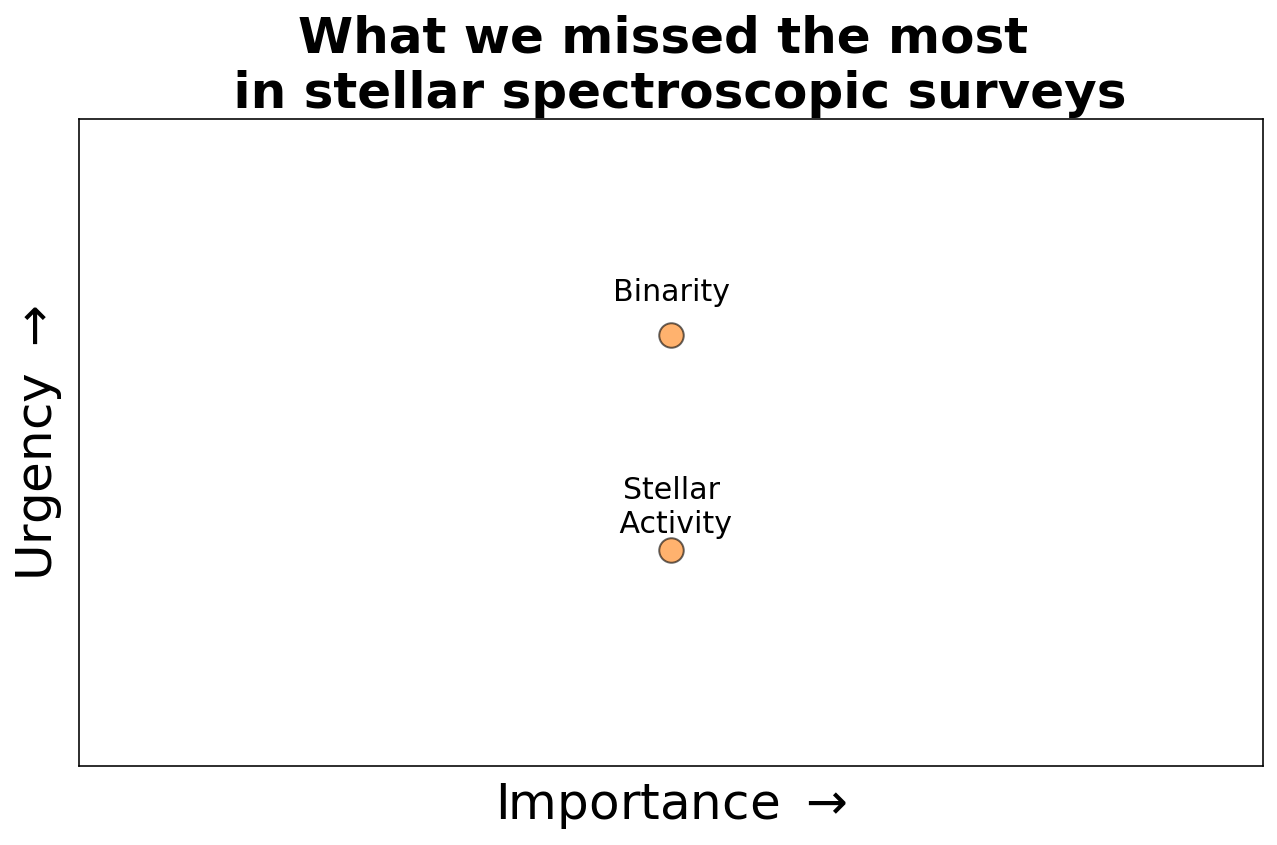

In [49]:
# Plotting section
fig, ax = plt.subplots(figsize=(9, 6))

for cat in np.unique(t['Category']):
    subset = t[t['Category'] == cat]
    ax.scatter(subset['Importance'], subset['Urgency'], s=150, color=subset['Color'][0], 
               edgecolors='black', alpha=0.6, label=cat)
plt.title("What we missed the most \n in stellar spectroscopic surveys", fontsize=25, fontweight='bold')
plt.xlabel(r"Importance $\rightarrow$", fontsize=25)
plt.ylabel(r"Urgency $\rightarrow$", fontsize=25)

# Automatically set the x and y limits
plt.xlim(min(t['Importance'])-0.5, max(t['Importance'])+0.5)
plt.ylim(min(t['Urgency'])-0.5, max(t['Urgency'])+0.5)

# Remove axis ticks but keep the labels
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

if len(np.unique(t['Category'])) > 2:
    ax.legend(loc='upper left', fontsize=12)

# Annotate the points with abbreviations
for row in t:
    ax.annotate(row['Abbreviation'], (row['Importance'], row['Urgency'] + 0.1), fontsize=15, ha='center', va='center')

# Abbreviations footnote
footnote = ", ".join([f"{row['Abbreviation']} = {row['Topic']}" for row in t])
# plt.annotate(f"*Abbreviations: {footnote}", (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=10)

plt.tight_layout()
plt.savefig('spectral_fidelity_priorities.pdf',bbox_inches='tight');
plt.show()
plt.close()